<a href="https://colab.research.google.com/github/Juanete0809/ML_Projects/blob/main/1_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction

This will be my first machine learning proyect, so it won´t be perfect, but I hope I will learn and implement a lot of the things and methods that I have learned in the previous courses I took.

## Project Description

I will be predicting the prices of used cars. We will be building various Machine Learning models and Deep Learning models with different architectures. In the end, we will see how machine learning models perform in comparison to deep learning models.

The data is from a hiring competition that was live on machinehack.com You can download the file from the link below:

[MATHCO.THON: The Data Scientist Hiring Hackathon by TheMathCompany (machinehack.com)](https://machinehack.com/hackathons/data_hack_mathcothon_car_price_prediction_challenge/data)

I also follow the steps described in [this post](https://www.analyticsvidhya.com/blog/2021/07/car-price-prediction-machine-learning-vs-deep-learning/) from Analytics Vidya, but making some changes to practice more things.

### Step 1: Load File into Colab

I have my files in Google Drive, so I have to upload them from there

In [210]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [211]:
import pandas as pd 
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning Projects/1 - Car Price Prediction/train.csv')

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Step 2: Data Inspection

In [212]:
row, col = df.shape

print('The doc has ', row, ' rows and ', col, 'columns.')

df.describe().transpose() # transpose() converts rows into columns and viceversa

The doc has  19237  rows and  18 columns.


,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

We can see fron df.info() that ID is a number. We will discard that feature later.

Now we see the distribution of the data:

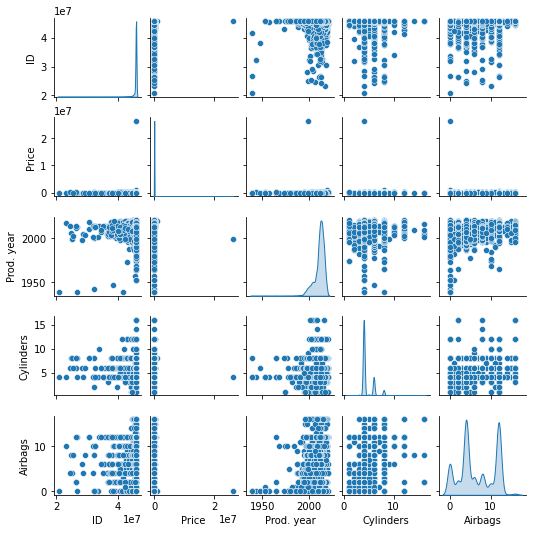

In [214]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde', height = 1.5)

### Step 3: Data Preparation

I'll drop the "ID" columns, since it doesn´t hold any significance in the prediction.

In [215]:
df.drop('ID', axis = 1, inplace = True)

If we see the column "Levy" actually has missing values, but they put "-" instead of a null value.

- First, we will erase those " - " and put null values.
- Then, we have to convert "Levy" into a float type
- Last, we replace the missing values with the mean

In [216]:
df['Levy'] = df['Levy'].replace('-',np.nan)
df['Levy'] = df['Levy'].astype(float)

Here I'll create a copy so I don´t have to make all the previous steps if I messed something up...

In [217]:
df_1 = df.copy()
df_1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [218]:
levy_column = df_1.loc[:,'Levy']
levy_column

0        1399.0
1        1018.0
2           NaN
3         862.0
4         446.0
          ...  
19232       NaN
19233     831.0
19234     836.0
19235    1288.0
19236     753.0
Name: Levy, Length: 19237, dtype: float64

In [219]:
levy_array = levy_column.values # I need to convert it into an array in order to use Numpy mean function

levy_mean = np.nanmean(levy_array)

levy_mean

906.8381278879118

In [220]:
df_1['Levy'] = df_1['Levy'].replace(np.nan, levy_mean)

df_1.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Now I'll edit the "Mileage" column so I get only the kilometers, and transform it into a number

In [221]:
df_1['Mileage'] = df_1['Mileage'].apply(lambda x: x.split()[0]) # I get the first element of the string
df_1['Mileage'] = pd.to_numeric(df_1['Mileage']) # Another way is using "df_1['Mileage'].astype('int')"

In the "Engine Volume" column we have also the "type" (turbo or not turbo). We will create a new variable with that information, and then change the "Engine Volume" column to float.

In [222]:
df_1['Turbo'] = df_1['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)
df_1['Engine volume'] = df_1['Engine volume'].apply(lambda x: x.split()[0]).astype('float')
# Another way could be "df_1['Engine volume'].apply(lambda x:str(x).replace('Turbo',''))"

We clean the column "Doors"

In [223]:
df_1['Doors'].unique()
df_1['Doors']=df_1['Doors'].map({'04-May':'4_5','02-Mar':'2_3','>5':'5'})

df_1['Doors']=df_1['Doors'].astype(str)

### Step 4: Handling Outliers

Here we will see if there are outliers in the data. We are using boxplots and the Inter Quantile Range(IQR). 

Any observation lower than (25% percentile - 1.5 * IQR) or higher than (75% percentile - 1.5 * IQR) will be considered an outlier and discarted.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


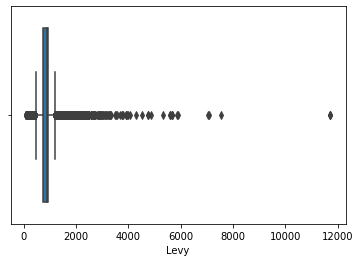

In [224]:
cols=['Levy','Engine volume', 'Mileage','Cylinders','Airbags'] # We get only the columns with numerical values

sns.boxplot(df_1[cols[0]]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


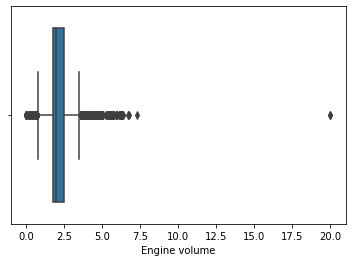

In [225]:
sns.boxplot(df_1[cols[1]]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


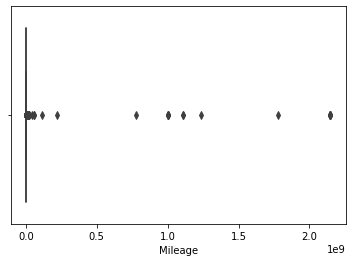

In [226]:
sns.boxplot(df_1[cols[2]]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


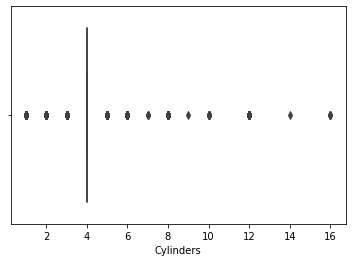

In [227]:
sns.boxplot(df_1[cols[3]]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


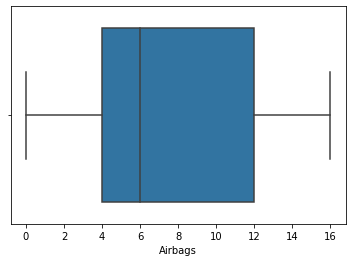

In [228]:
sns.boxplot(df_1[cols[4]]);

All values except "Aisbags" have outliers. We proceed to delete them. I'll do another copyso I don't have to make all the previous steps.

In [229]:
df_2 = df_1.copy()

df_2.shape

(19237, 18)

In [230]:
import numpy as np

def outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR # Define the lower and upper bounds for the variable

  list_outliers = df.index[(df[col] < lower) | (df[col] > upper)] # Create a list to store the indexes of the outliers if 1 of the 2 conditions I defined hold true
  # The "|" symbol implies "OR"

  return list_outliers

# Create a list to store the output indexes of multiple columns

index_list = []

for i in cols:
  index_list.extend(outliers(df_2, i))


In [231]:
# Define a function to return a cleaned dataframe without outliers

def remove(df,il):
  il = sorted(set(il)) # We need to sort the index list and make sure the indexes are unique
  df = df.drop(il) # Drop all the indexes from the dataframe that are in the index list
  return df

In [232]:
df_cleaned = remove(df_2,index_list)

In [233]:
df_cleaned.shape

(12273, 18)

### Step 5: Creating aditional features

We see that ‘Mileage’ and ‘Engine Volume’ are continuous variables. While performing regression I have observed that binning such variables can help increase the performance of the model.

We will also create a new variable by dividing 'Mileage' and the years of the car


In [234]:
labels=[0,1,2,3,4,5,6,7,8,9]

df_cleaned['Mileage_bin']=pd.cut(df_cleaned['Mileage'],len(labels),labels=labels)
df_cleaned['Mileage_bin']=df_cleaned['Mileage_bin'].astype(float)

labels=[0,1,2,3,4]

df_cleaned['EV_bin']=pd.cut(df_cleaned['Engine volume'],len(labels),labels=labels)
df_cleaned['EV_bin']=df_cleaned['EV_bin'].astype(float)

In [235]:
import datetime

currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")

year = int(year)
year

df_cleaned = df_cleaned.rename(columns={'Prod. year':'Prod_year'})

df_cleaned['km_per_year'] = df_cleaned.Mileage / (year - df_cleaned.Prod_year)

df_cleaned.km_per_year = round(df_cleaned.km_per_year,0)

df_cleaned.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Mileage_bin,EV_bin,km_per_year
2,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4_5,Right-hand drive,Black,2,0,5.0,0.0,13333.0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4_5,Left wheel,White,0,0,4.0,3.0,16897.0
5,39493,891.000000,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4_5,Left wheel,White,4,0,4.0,2.0,32186.0
6,1803,761.000000,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,4_5,Left wheel,White,12,0,7.0,1.0,23537.0
7,549,751.000000,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,4_5,Left wheel,Grey,12,0,5.0,2.0,27015.0


### Step 6: Handling Cathegorical Variables

Here I think differently than the post I'm basing my analysis on. In the post, they used Ordinal Encoder to handle the categorical columns. OrdinalEncoder works similar to LabelEncoder but OrdinalEncoder can be applied to multiple features while LabelEncoder can be applied to One feature at a time.

The problem is that **OrdinalEncoder** is used when you have an Ordinal Categorical Variable (for example, the education level).

If we see the different categorical variables in our dataframe, we can see that none of these follow a specific order (there are no values in a certain column that are more important thatn others). 

Having said that, I think that the best way of proceeding is by creating dummy variables for all these cases. To do that, I'll use the **.getDummies()** function.

In [236]:
cat_df = df_cleaned.select_dtypes(include=object)
cat_df # I create this table only to see that any categorical variable is Ordinal

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,4_5,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,4_5,Left wheel,White
5,HYUNDAI,Santa FE,Jeep,Yes,Diesel,Automatic,Front,4_5,Left wheel,White
6,TOYOTA,Prius,Hatchback,Yes,Hybrid,Automatic,Front,4_5,Left wheel,White
7,HYUNDAI,Sonata,Sedan,Yes,Petrol,Automatic,Front,4_5,Left wheel,Grey
...,...,...,...,...,...,...,...,...,...,...
19230,TOYOTA,Prius,Hatchback,Yes,Hybrid,Automatic,Front,4_5,Left wheel,Silver
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,Manual,Rear,2_3,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,4_5,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,4_5,Left wheel,Grey


In [237]:
cat_df.columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [241]:
df_final = pd.get_dummies(df_cleaned, columns = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type','Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'])

df_final.head()

,Price,Levy,Prod_year,Engine volume,Mileage,Cylinders,Airbags,Turbo,Mileage_bin,EV_bin,km_per_year,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,Manufacturer_DAIHATSU,Manufacturer_DODGE,Manufacturer_FIAT,Manufacturer_FORD,Manufacturer_GAZ,Manufacturer_GMC,Manufacturer_HAVAL,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_INFINITI,Manufacturer_JAGUAR,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LANCIA,Manufacturer_LAND ROVER,Manufacturer_LEXUS,Manufacturer_LINCOLN,Manufacturer_MAZDA,Manufacturer_MERCEDES-BENZ,...,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_No,Leather interior_Yes,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_2_3,Doors_4_5,Doors_5,Wheel_Left wheel,Wheel_Right-hand drive,Color_Beige,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467,906.838128,2006,1.3,200000,4.0,2,0,5.0,0.0,13333.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2011,2.5,168966,4.0,0,0,4.0,3.0,16897.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,39493,891.000000,2016,2.0,160931,4.0,4,0,4.0,2.0,32186.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,1803,761.000000,2010,1.8,258909,4.0,12,0,7.0,1.0,23537.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,549,751.000000,2013,2.4,216118,4.0,12,0,5.0,2.0,27015.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Developing Models

Now we'll evaluate the data using differnt Random Forest. I'll then compare the results with 2 Deep Learning models (2 Neural Networks of different size). 

### Data Splitting and Scaling

We will split the data into 80/20 for the training and test sets

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final.drop(['Price'],axis=1)

y = df_final['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25)

scaler = StandardScaler() # Normalize variables

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Random Forest

In [243]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor


model=RandomForestRegressor(n_estimators=200)

model.fit(X_train_scaled,np.log(y_train))


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Predict the outcom for the y_test set

In [244]:
predictions = model.predict(X_test_scaled)

predictions = np.exp(predictions)

mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)
r2s = r2_score(y_test,predictions)
msle = mean_squared_log_error(y_test,predictions)

rmse = round(np.sqrt(mse),2) # Mean Squared Error
mae = round(mae,2) # Mean Absolute Error
r2s = round(r2s,2) # R^2 Score
rmsle = round(np.sqrt(msle),2) # Root Mean Squared Log Error: it only cares about the percentual difference between them. MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

results = [rmse,mae,r2s,rmsle]

results


[7370.38, 3866.15, 0.76, 0.96]

In [267]:
from prettytable import PrettyTable

summary = PrettyTable(['Model','RMSE','MAE','R2S','RMSLE'])

summary.add_row(['Random Forest']+results)
summary.add_row(['RF Post', round(np.sqrt(106322708.44),2), 4595.32, 'Not Defined', 0.79])

print(summary)

+---------------+----------+---------+-------------+-------+
|     Model     |   RMSE   |   MAE   |     R2S     | RMSLE |
+---------------+----------+---------+-------------+-------+
| Random Forest | 7370.38  | 3866.15 |     0.76    |  0.96 |
|    RF Post    | 10311.29 | 4595.32 | Not Defined |  0.79 |
+---------------+----------+---------+-------------+-------+


I'll try to plot the results along with the predicted values

In [245]:
import matplotlib.pyplot as plt

In [246]:
y_test_array = np.array(y_test)

y_test_array.shape

(2455,)

In [ ]:
y_test_array_df = pd.DataFrame(y_test_array, columns = ['Test'])
predictions_df = pd.DataFrame(predictions, columns = ['Predictions'])

y_test_array_df['Predictions'] = predictions_df['Predictions']
y_test_array_df['Difference'] = y_test_array_df['Predictions'] - y_test_array_df['Test']

y_test_array_df

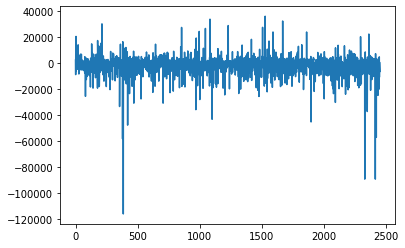

In [248]:
plt.plot(y_test_array_df['Difference'])

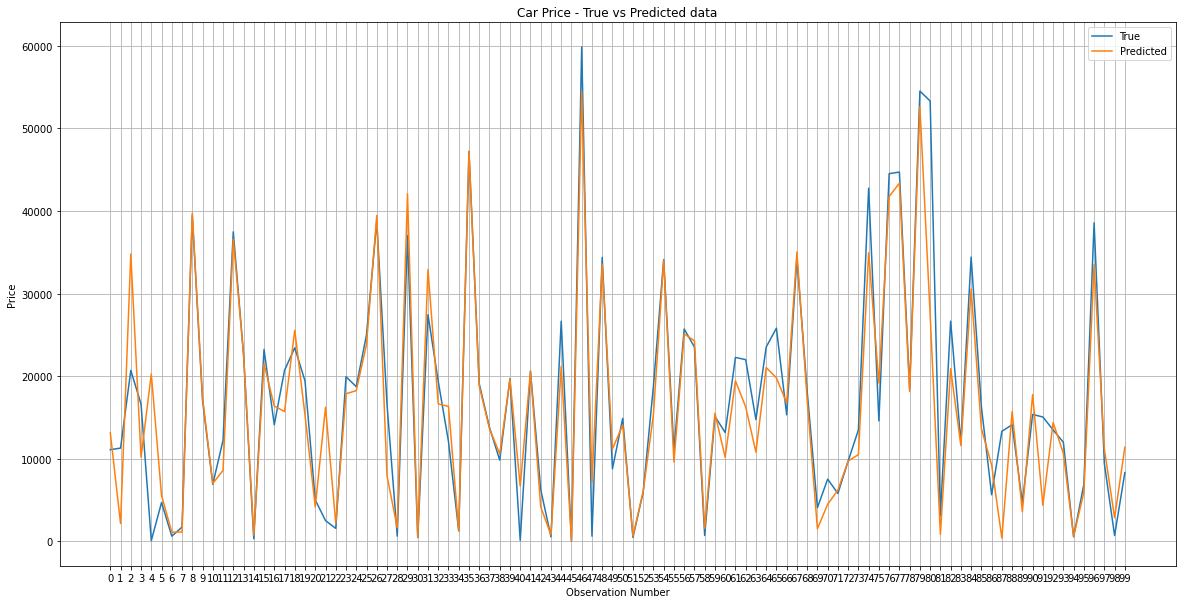

In [257]:
y_pred = np.exp(model.predict(X_test_scaled))

number_of_observations=100

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

### Neural Network

In [260]:
from keras.models import Sequential
from keras.layers import Dense

model_dl=Sequential()

model_dl.add(Dense(16,input_dim=X_train_scaled.shape[1],activation='relu'))
model_dl.add(Dense(8,activation='relu'))
model_dl.add(Dense(4,activation='relu'))
model_dl.add(Dense(1,activation='linear'))

model_dl.compile(loss='mean_squared_error',optimizer='adam')

model_dl.summary()

epochs=20

batch_size=10

model_dl.fit(X_train_scaled,np.log(y_train),verbose=0,validation_data=(X_test_scaled,np.log(y_test)),epochs=epochs,batch_size=batch_size)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                17568     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17,745
Trainable params: 17,745
Non-trainable params: 0
_________________________________________________________________


Plot the loss and validation loss of the dataset

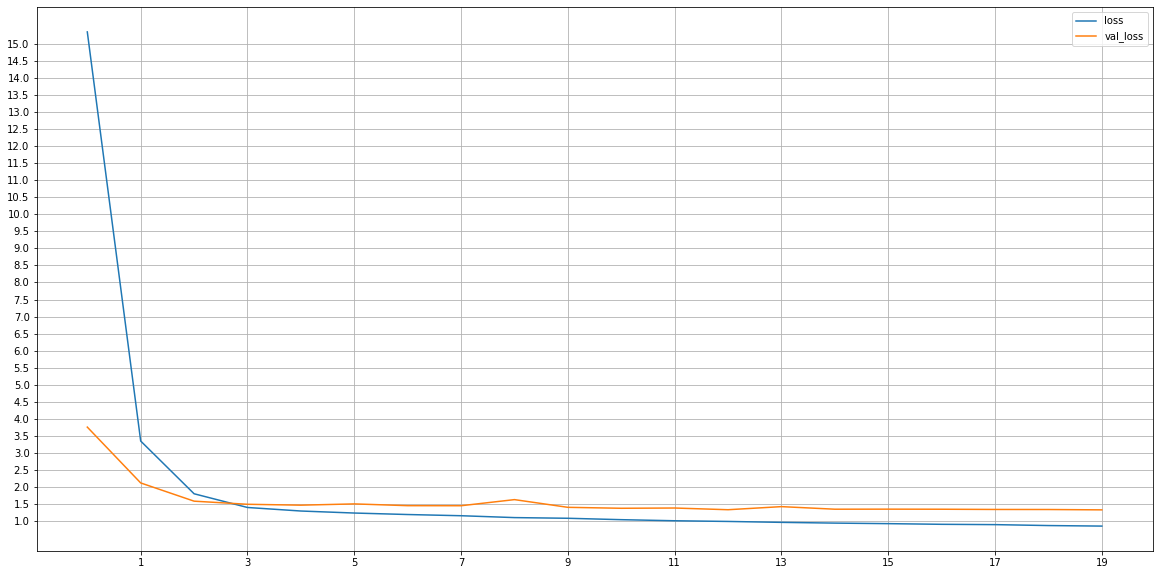

In [261]:
history_df = pd.DataFrame(model_dl.history.history)

plt.figure(figsize=(20,10))

plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xticks(np.arange(1,epochs+1,2))

plt.yticks(np.arange(1,max(history_df['loss']),0.5))
plt.legend()
plt.grid()

Getting the metrics

In [264]:
predictions_dl = model_dl.predict(X_test_scaled)

predictions_dl = np.exp(predictions_dl)

mse_dl = mean_squared_error(y_test,predictions_dl)
mae_dl = mean_absolute_error(y_test,predictions_dl)
r2s_dl = r2_score(y_test,predictions_dl)
msle_dl = mean_squared_log_error(y_test,predictions_dl)

rmse_dl = round(np.sqrt(mse_dl),2) # Mean Squared Error
mae_dl = round(mae_dl,2) # Mean Absolute Error
r2s_dl = round(r2s_dl,2) # R^2 Score
rmsle_dl = round(np.sqrt(msle_dl),2) # Root Mean Squared Log Error: it only cares about the percentual difference between them. MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

results_dl = [rmse_dl,mae_dl,r2s_dl,rmsle_dl]

results_dl

[11956.14, 6997.4, 0.38, 1.15]

Plot the final table comparing the results:

In [268]:
summary.add_row(['Neural Network']+results_dl)
summary.add_row(['Small NN Post', round(np.sqrt(177649565.68),2), 7191.19, 'Not Defined', 1.31])

print(summary)

+----------------+----------+---------+-------------+-------+
|     Model      |   RMSE   |   MAE   |     R2S     | RMSLE |
+----------------+----------+---------+-------------+-------+
| Random Forest  | 7370.38  | 3866.15 |     0.76    |  0.96 |
|    RF Post     | 10311.29 | 4595.32 | Not Defined |  0.79 |
| Neural Network | 11956.14 |  6997.4 |     0.38    |  1.15 |
| Small NN Post  | 13328.52 | 7191.19 | Not Defined |  1.31 |
+----------------+----------+---------+-------------+-------+
